In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from sklearn.metrics import mean_squared_error
from numpy import array
from numpy import savetxt

In [77]:
df = pd.read_csv("C:\\Users\\arjun\\Desktop\\allprices\\crypto-markets.csv", parse_dates=["date"], index_col="date")
df.shape

(942297, 12)

In [81]:
df['slug'].value_counts()

litecoin                            2042
bitcoin                             2042
namecoin                            2042
novacoin                            2041
peercoin                            2041
feathercoin                         2037
terracoin                           2027
bitbar                              2014
worldcoin                           2003
digitalcoin                         1999
goldcoin                            1988
primecoin                           1968
anoncoin                            1948
ripple                              1944
bullion                             1939
ixcoin                              1939
megacoin                            1938
infinitecoin                        1930
freicoin                            1930
quark                               1919
phoenixcoin                         1907
zetacoin                            1903
fastcoin                            1876
argentum                            1840
tagcoin         

In [19]:
df = df[df.slug == "litecoin"][['close']]

In [20]:
df['index']=df.index
df

,close,index
date,,
2013-04-28,4.35,2013-04-28
2013-04-29,4.38,2013-04-29
2013-04-30,4.30,2013-04-30
2013-05-01,3.80,2013-05-01
2013-05-02,3.37,2013-05-02
2013-05-03,3.04,2013-05-03
2013-05-04,3.48,2013-05-04
2013-05-05,3.59,2013-05-05
2013-05-06,3.37,2013-05-06


Text(0.5, 1.0, 'Price of Litecoin')

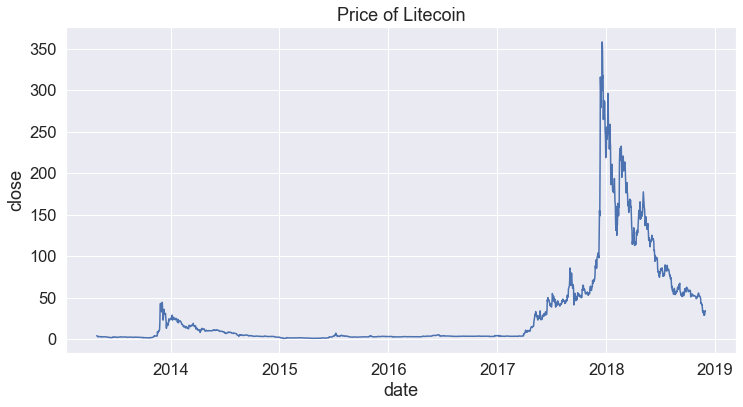

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y="close", data=df).set_title("Price of Litecoin")

Text(0.5, 0.9, 'Down-sampled to 10-day periods')

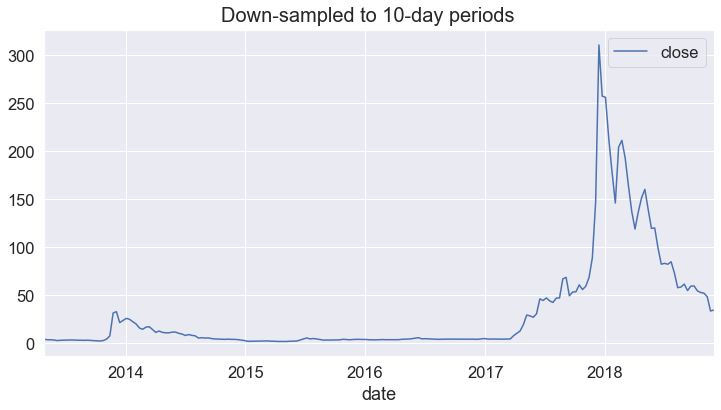

In [22]:
df.resample('10D').mean().plot(figsize=(12,6))
plt.figtext(.5,0.9,"Down-sampled to 10-day periods", fontsize=20, ha='center')

In [23]:
data = df.iloc[:, 0]
hist = []
target = []
length = 90
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)



In [24]:
X=np.array(hist)
X.shape

(1952, 90)

In [25]:
y=np.array(target)
y.shape

(1952,)

In [26]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [27]:
hist_scaled = hist.reshape((len(hist), length, 1))
print(hist_scaled.shape)


(1952, 90, 1)


In [66]:
X_train = hist_scaled[:1900,:,:]
X_test = hist_scaled[1900:,:,:]
y_train = target[:1900,:]
y_test = target[1900:,:]


In [70]:
y_test.shape
savetxt("testing_values.txt",y_test)

In [75]:
loadarray=X_test.reshape(X_test.shape[0],-1)

In [31]:
savetxt("need_data.txt",loadarray)

In [32]:
loadarray.shape

(52, 90)

In [33]:
loadarray.reshape(52,90,1)

array([[[78.7 ],
        [76.81],
        [76.94],
        ...,
        [57.84],
        [58.16],
        [59.41]],

       [[76.81],
        [76.94],
        [76.72],
        ...,
        [58.16],
        [59.41],
        [58.71]],

       [[76.94],
        [76.72],
        [78.94],
        ...,
        [59.41],
        [58.71],
        [57.98]],

       ...,

       [[61.77],
        [60.32],
        [61.93],
        ...,
        [29.22],
        [30.89],
        [29.41]],

       [[60.32],
        [61.93],
        [65.95],
        ...,
        [30.89],
        [29.41],
        [31.07]],

       [[61.93],
        [65.95],
        [65.65],
        ...,
        [29.41],
        [31.07],
        [34.63]]])

In [45]:
newmodel = Sequential()
newmodel.add(LSTM(units=30, return_sequences= True, input_shape=(X_train.shape[1],1)))
newmodel.add(LSTM(units=30, return_sequences=True))
newmodel.add(Dropout(0.2))
newmodel.add(LSTM(units=30))
newmodel.add(Dropout(0.2))

newmodel.add(Dense(units=1))
newmodel.summary()
newmodel.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 90, 30)            3840      
_________________________________________________________________
lstm_12 (LSTM)               (None, 90, 30)            7320      
_________________________________________________________________
dropout (Dropout)            (None, 90, 30)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 18,511
Trainable params: 18,511
Non-trainable params: 0
__________________________________________________

In [46]:
history = newmodel.fit(X_train, y_train, epochs=30, batch_size=32)

Train on 1900 samples
Epoch 1/30
1900/1900 [==============================] - 16s 9ms/sample - loss: 3916.0525
Epoch 2/30
1900/1900 [==============================] - 7s 4ms/sample - loss: 3687.9508
Epoch 3/30
1900/1900 [==============================] - 7s 4ms/sample - loss: 3593.7567
Epoch 4/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 3479.6827
Epoch 5/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 3377.1915
Epoch 6/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 3296.9155
Epoch 7/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 3213.0507
Epoch 8/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 3138.4856
Epoch 9/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 3067.5033
Epoch 10/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 2995.6975
Epoch 11/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 2930.8252
Epoch 1

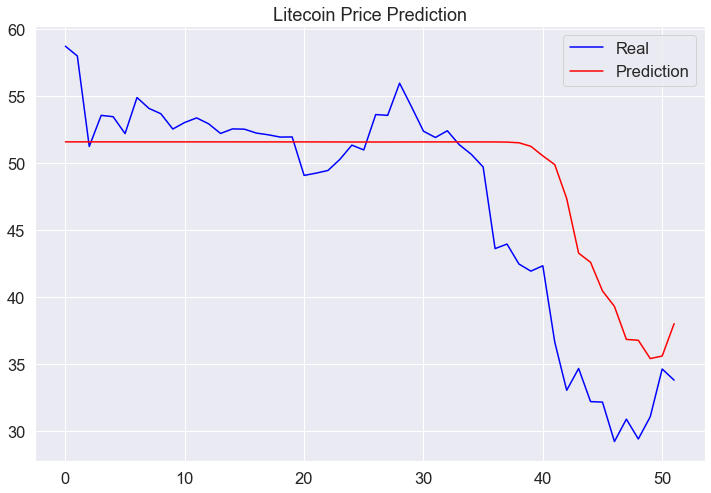

In [48]:
pred = newmodel.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()

In [50]:
history = newmodel.fit(X_train, y_train, epochs=30, batch_size=32)

Train on 1900 samples
Epoch 1/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1926.7918
Epoch 2/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1888.3683
Epoch 3/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1859.5553
Epoch 4/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1817.9159
Epoch 5/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1770.8893
Epoch 6/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1764.1627
Epoch 7/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1725.2113
Epoch 8/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1691.9390
Epoch 9/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1653.4114
Epoch 10/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1622.5636
Epoch 11/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1607.8565
Epoch 12

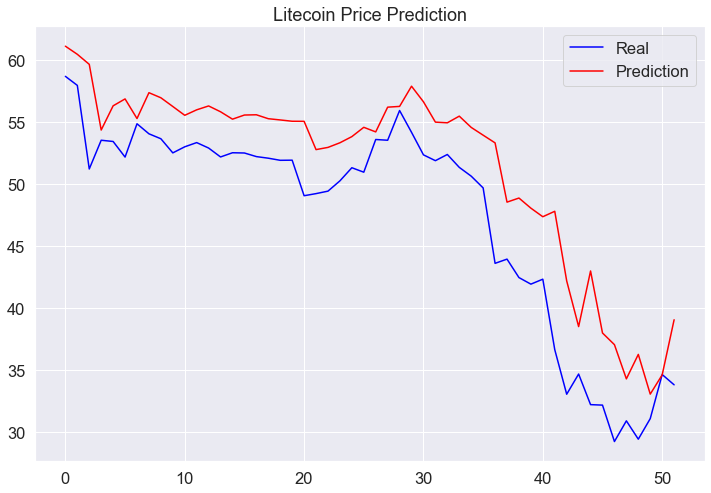

In [52]:
pred = newmodel.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()

In [54]:
print(newmodel.predict(X_test[0].reshape(1,90,1)))
pred[0]

[[61.14523]]


array([61.14523], dtype=float32)

In [56]:
history = newmodel.fit(X_train, y_train, epochs=30, batch_size=32)

Train on 1900 samples
Epoch 1/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1107.9046
Epoch 2/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1119.1915
Epoch 3/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1068.2798
Epoch 4/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1052.0102
Epoch 5/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1035.0426
Epoch 6/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 1030.1625
Epoch 7/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 992.7679
Epoch 8/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 956.5810
Epoch 9/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 932.2404
Epoch 10/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 952.9279
Epoch 11/30
1900/1900 [==============================] - 8s 4ms/sample - loss: 932.3700
Epoch 12/30
1

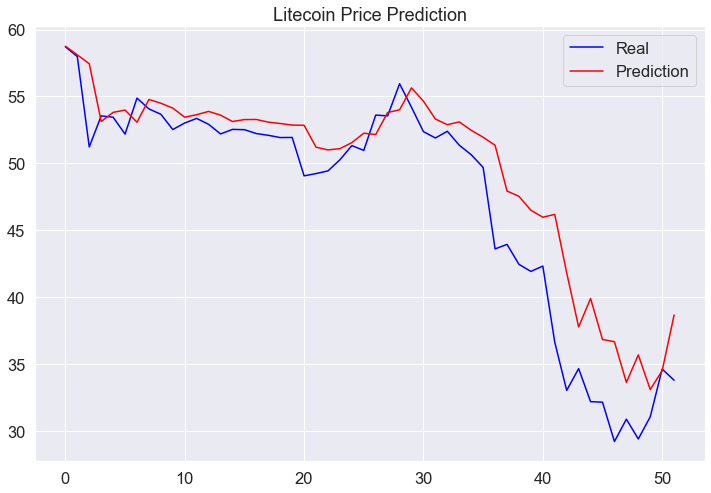

In [64]:
pred = newmodel.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real',animated=1)
plt.plot(pred, color='red', label='Prediction')
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()

In [59]:
newmodel.save("litecoin_uni.h5")

In [34]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

Train on 1900 samples
Epoch 1/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 563.0175
Epoch 2/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 551.5250
Epoch 3/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 539.2547
Epoch 4/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 529.2934
Epoch 5/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 519.0819
Epoch 6/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 506.2815
Epoch 7/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 496.3773
Epoch 8/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 489.8674
Epoch 9/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 481.0173
Epoch 10/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 468.6851
Epoch 11/30
1900/1900 [==============================] - 9s 5ms/sample - loss: 460.2948
Epoch 12/30
1900/19

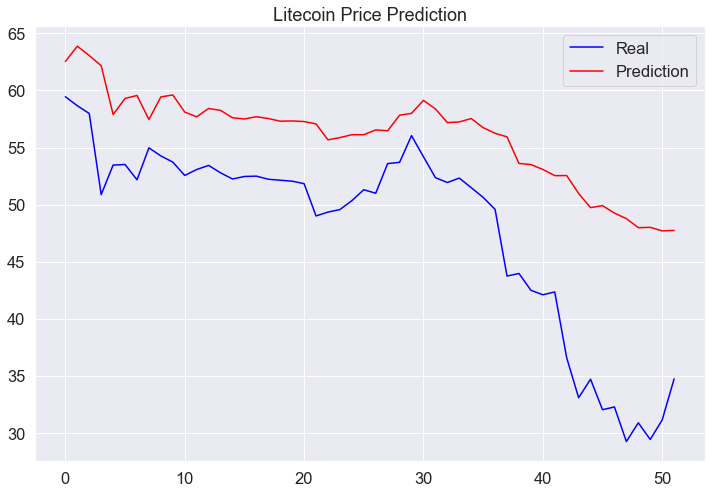

In [35]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()

In [21]:
X_train.shape

(1900, 90, 1)

In [22]:
type(X_test[0,0,0])

numpy.float64

In [23]:
x_input=X_train[-1]
#x_input = x_input.reshape((1, n_steps, n_features))
x_input.shape

(90, 1)

In [24]:
def predictor(model,X_train,n):
    x_input = X_train[-1]
    n_steps=90
    n_features=1
    temp_input=list(x_input)
    lst_output=[]
    i=0
    while(i<n):
        if(len(temp_input)>90):
            #print("new this")
            x_input=array(temp_input[1:])
            print("{} day input {}".format(i,x_input.shape))
            #print(x_input)
            x_input = x_input.reshape((1, n_steps, n_features))
            print(x_input.shape)
            #print(x_input)
            x_input=np.asarray(x_input).astype(np.float64)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.append(yhat[0][0])
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.append(yhat[0][0])
            i=i+1
            
        else:
            #print("inside else")
            x_input = x_input.reshape((1, n_steps, n_features))
            print(x_input.shape)
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0][0])
            temp_input.append(yhat[0][0])
            #print(len(temp_input))
            lst_output.append(yhat[0][0])
            i=i+1
    return lst_output



In [41]:
t=model.predict(X_train[-1].reshape(1,90,1))
last_list=list(X_train[-1])
#print(last_list[-1])
last_list.append(t)

print(len(last_list))
last_list=last_list[1:92]
print(len(last_list))
print(last_list[-1])
last_list=np.array(last_list)
last_list=np.asarray(last_list).astype(np.float64)


t1=model.predict(np.array(last_list).reshape(1,90,1))
print(f"t1 {t1}")
last_list=list(last_list)
last_list.append(t1)
print(len(last_list))
last_list=last_list[1:91]
print(len(last_list))
last_list=np.array(last_list)
last_list=np.asarray(last_list).astype(np.float64)


t2=model.predict(np.array(last_list).reshape(1,90,1))
print(f"t2 {t2}")
last_list=list(last_list)
last_list.append(t1)
print(len(last_list))
last_list=last_list[1:91]
print(len(last_list))
last_list=np.array(last_list)
last_list=np.asarray(last_list).astype(np.float64)

t3=model.predict(np.array(last_list).reshape(1,90,1))
print(t3)

last_list=list(last_list)
last_list.append(t1)
print(len(last_list))
last_list=last_list[1:91]
print(len(last_list))
last_list=np.array(last_list)
last_list=np.asarray(last_list).astype(np.float64)
t4=model.predict(np.array(last_list).reshape(1,90,1))
print(t4)

91
90
[[59.920296]]
t1 [[61.42668]]
91
90
t2 [[62.965977]]
91
90
[[63.201797]]
91
90
[[63.22959]]


In [39]:
model.predict(X_train[-2].reshape(1,90,1))

array([[59.70662]], dtype=float32)

In [40]:
output=predictor(model,X_train,50)

hello
(1, 90, 1)
59.920296
new this
1 day input (90,)
(1, 90, 1)
1 day output [[61.42668]]
new this
2 day input (90,)
(1, 90, 1)
2 day output [[62.965977]]
new this
3 day input (90,)
(1, 90, 1)
3 day output [[64.61049]]
new this
4 day input (90,)
(1, 90, 1)
4 day output [[66.39081]]
new this
5 day input (90,)
(1, 90, 1)
5 day output [[68.32108]]
new this
6 day input (90,)
(1, 90, 1)
6 day output [[70.42989]]
new this
7 day input (90,)
(1, 90, 1)
7 day output [[72.72298]]
new this
8 day input (90,)
(1, 90, 1)
8 day output [[75.15187]]
new this
9 day input (90,)
(1, 90, 1)
9 day output [[77.58099]]
new this
10 day input (90,)
(1, 90, 1)
10 day output [[79.820656]]
new this
11 day input (90,)
(1, 90, 1)
11 day output [[81.73518]]
new this
12 day input (90,)
(1, 90, 1)
12 day output [[83.29674]]
new this
13 day input (90,)
(1, 90, 1)
13 day output [[84.54535]]
new this
14 day input (90,)
(1, 90, 1)
14 day output [[85.527245]]
new this
15 day input (90,)
(1, 90, 1)
15 day output [[86.27254]

In [28]:
pred=model.predict(X_test[:50,:].reshape(50,90,1))
print(pred)

[[60.9984  ]
 [60.63045 ]
 [60.03493 ]
 [55.88808 ]
 [56.279728]
 [56.45546 ]
 [55.69368 ]
 [57.53194 ]
 [57.27022 ]
 [56.939625]
 [56.179382]
 [56.389267]
 [56.70289 ]
 [56.45378 ]
 [55.940723]
 [56.121147]
 [56.162746]
 [55.971783]
 [55.872665]
 [55.757492]
 [55.759396]
 [53.881622]
 [53.66225 ]
 [53.87353 ]
 [54.49439 ]
 [55.387756]
 [55.22521 ]
 [57.235607]
 [57.372246]
 [59.221195]
 [57.999817]
 [56.335636]
 [55.689133]
 [55.95689 ]
 [55.294876]
 [54.725677]
 [54.056744]
 [50.292603]
 [49.814053]
 [48.882183]
 [48.379585]
 [48.792267]
 [44.82762 ]
 [41.927307]
 [44.127495]
 [41.67182 ]
 [41.38704 ]
 [38.815445]
 [39.995346]
 [37.36772 ]]


In [29]:
output=np.array(output)
output[0]

59.920296

In [30]:
X.shape

(1952, 90)

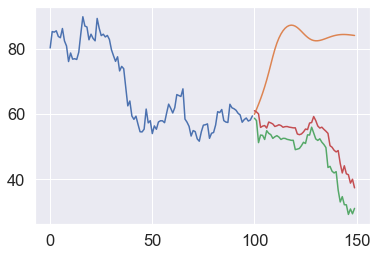

In [31]:
plt.plot(np.arange(100),y_train[1800:])
plt.plot(np.arange(100,150),output)
plt.plot(np.arange(100,150),y_test[:50])
plt.plot(np.arange(100,150),pred[:50])

In [37]:
model.predict(X_test[0].reshape(1,90,1))

array([[60.998405]], dtype=float32)